<a href="https://colab.research.google.com/github/Svhugani/QOptics/blob/main/TTCF_3CavitiesBalanced.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
pip install qutip

     |████████████████████████████████| 14.6MB 195kB/s 


In [2]:
import qutip as qt
import numpy as np
from matplotlib import pyplot as plt
from google.colab import files

In [9]:
def TTCF(tau, g, gamma, omega, dim):

  I = qt.identity(dim)
  a1 = qt.tensor(qt.destroy(dim), I, I)
  a2 = qt.tensor(I, qt.destroy(dim), I)
  a3 = qt.tensor(I, I, qt.destroy(dim))

  Hamilt = omega * (a1.dag() * a1 + a2.dag() * a2 + a3.dag() * a3) + g * (a1.dag() * a2 + a2.dag() * a1  + a2.dag() * a3 + a3.dag() * a2 )
  #L = -1.0j * (qt.spre(Hamilt) - qt.spost(Hamilt))
  #L += 2 * gamma * qt.lindblad_dissipator(a1)
  #L += 2 * gamma * qt.lindblad_dissipator(a3.dag())


  
  collapse = [np.sqrt(2 * gamma) * a1, np.sqrt(2 * gamma) * a3.dag()]
  results = []

  ttcf_a1 = qt.correlation_2op_1t(H = Hamilt, state0 = None, taulist = tau, c_ops = collapse, a_op = a1.dag(), b_op = a1, reverse = True)
  results.append(ttcf_a1)
  ttcf_a3 = qt.correlation_2op_1t(H = Hamilt, state0 = None, taulist = tau, c_ops = collapse, a_op = a3.dag(), b_op = a3, reverse = True)
  results.append(ttcf_a3)

  ttcf_a1a2 = qt.correlation_2op_1t(H = Hamilt, state0 = None, taulist = tau, c_ops = collapse, a_op = a1.dag(), b_op = a2, reverse = True)
  results.append(ttcf_a1a2)
  ttcf_a1a3 = qt.correlation_2op_1t(H = Hamilt, state0 = None, taulist = tau, c_ops = collapse, a_op = a1.dag(), b_op = a3, reverse = True)
  results.append(ttcf_a1a3)


  
  return results

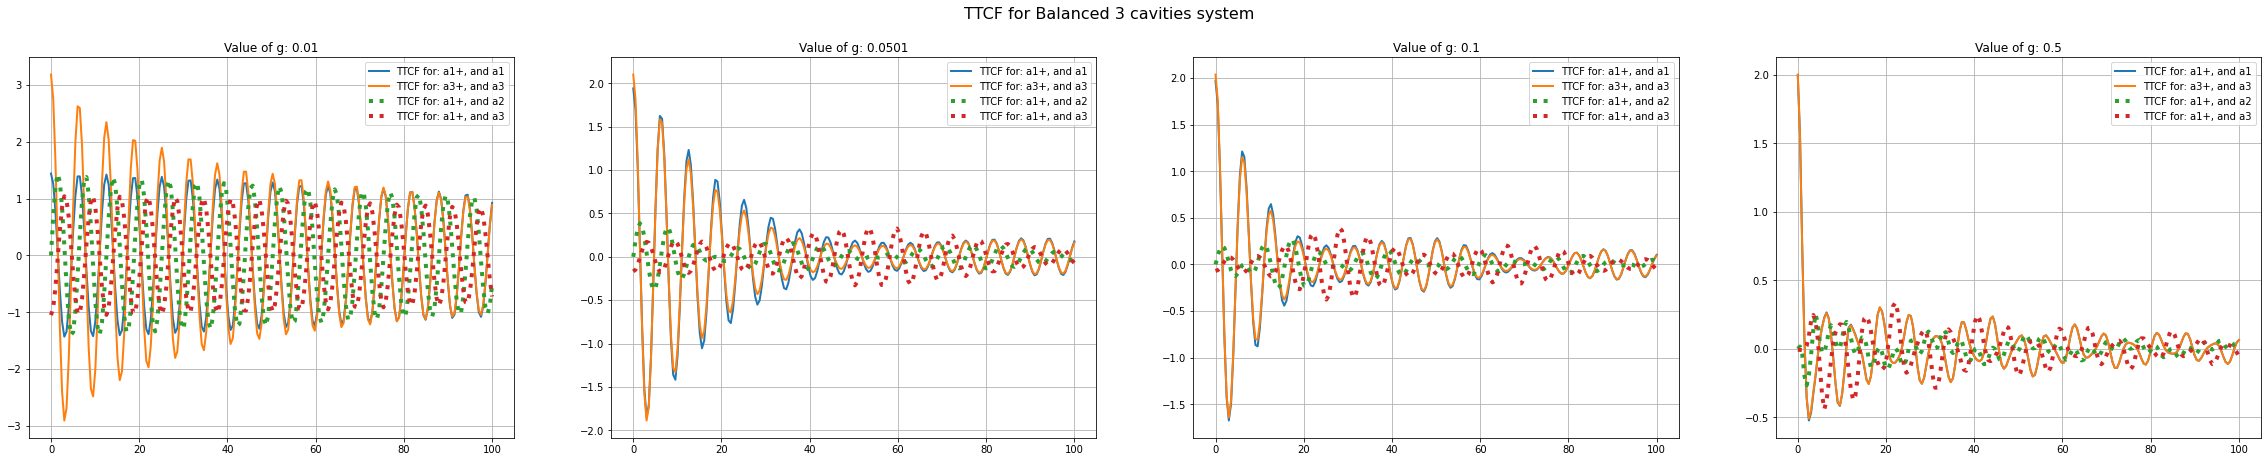

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [13]:
tau = np.linspace(0, 100, 200)
omega = 1
gamma = 0.01 * omega
dim = 5
gValues = [0.01, 0.0501, 0.1, .5]
limitG = gamma / np.sqrt(2)
#gValues = [0.95 * limitG, limitG, 1.05 * limitG]


fig = plt.figure()
fig.set_size_inches(40, 7)
iterator = 0

for g in gValues:
  iterator += 1
  Corr = TTCF(tau, g, gamma, omega, dim) 
  ax = fig.add_subplot(1, len(gValues), iterator)
  ax.grid()
  ax.legend()
  ax.set_title("Value of g: " + str(g))
  line1 = ax.plot(tau, np.real(Corr[0]), linestyle = "solid", linewidth = 2 ,label = "TTCF for: a1+, and a1" )
  line2 = ax.plot(tau, np.real(Corr[1]), linestyle = "solid", linewidth = 2 ,label = "TTCF for: a3+, and a3" ) 
  line3 = ax.plot(tau, np.real(Corr[2]), linestyle = "dotted", linewidth = 4 ,label = "TTCF for: a1+, and a2" )
  line4 = ax.plot(tau, np.real(Corr[3]), linestyle = "dotted", linewidth = 4 ,label = "TTCF for: a1+, and a3" ) 
  ax.set_label("subFor" + str(g))
  ax.legend()
  #ax.set_yscale("log")

mainTitle = "TTCF for Balanced 3 cavities system"
fig.suptitle(mainTitle, fontsize=16)
plt.show()
filename = mainTitle + ".png"
fig.savefig(filename)

files.download(filename) 

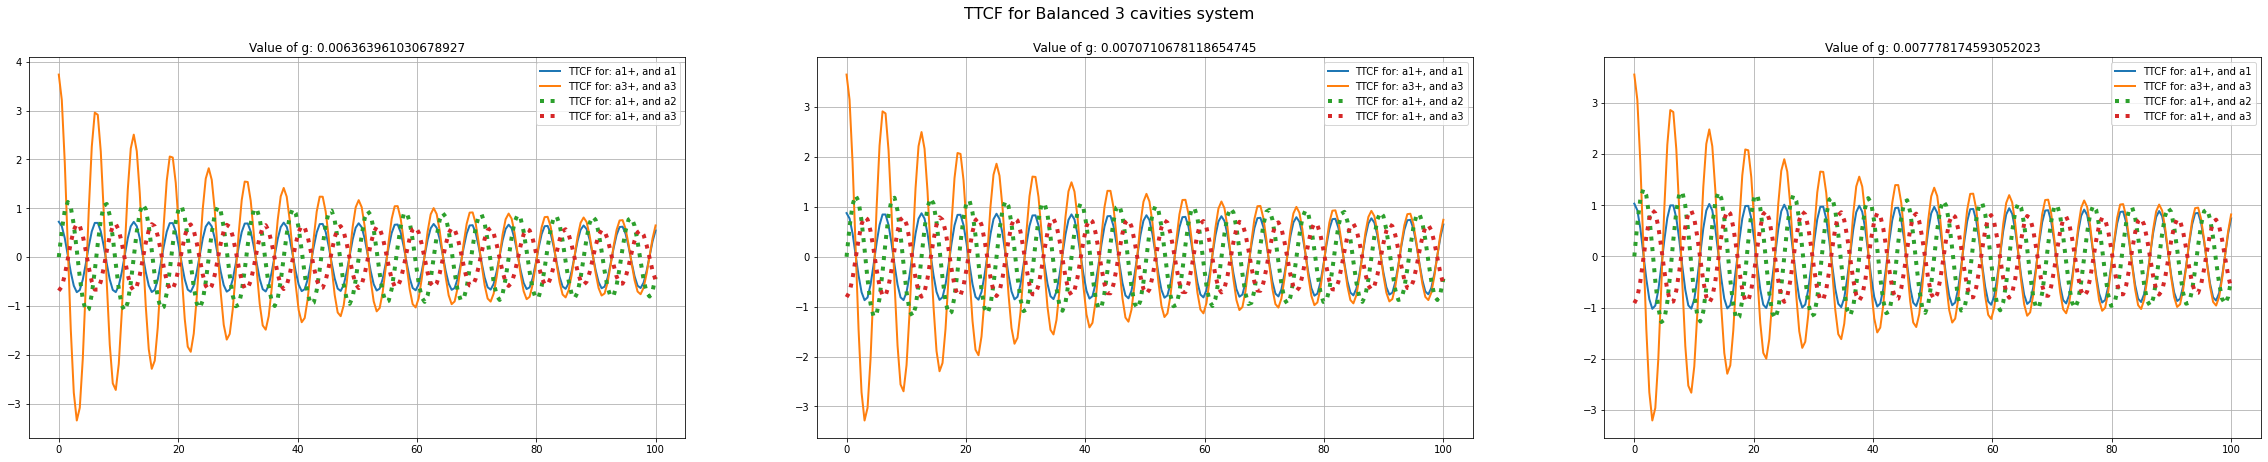

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [14]:
tau = np.linspace(0, 100, 200)
omega = 1
gamma = 0.01 * omega
dim = 5
#gValues = [0.01, 0.0501, 0.1, .5]
limitG = gamma / np.sqrt(2)
gValues = [0.90 * limitG, limitG, 1.1 * limitG]


fig = plt.figure()
fig.set_size_inches(40, 7)
iterator = 0

for g in gValues:
  iterator += 1
  Corr = TTCF(tau, g, gamma, omega, dim) 
  ax = fig.add_subplot(1, len(gValues), iterator)
  ax.grid()
  ax.legend()
  ax.set_title("Value of g: " + str(g))
  line1 = ax.plot(tau, np.real(Corr[0]), linestyle = "solid", linewidth = 2 ,label = "TTCF for: a1+, and a1" )
  line2 = ax.plot(tau, np.real(Corr[1]), linestyle = "solid", linewidth = 2 ,label = "TTCF for: a3+, and a3" ) 
  line3 = ax.plot(tau, np.real(Corr[2]), linestyle = "dotted", linewidth = 4 ,label = "TTCF for: a1+, and a2" )
  line4 = ax.plot(tau, np.real(Corr[3]), linestyle = "dotted", linewidth = 4 ,label = "TTCF for: a1+, and a3" ) 
  ax.set_label("subFor" + str(g))
  ax.legend()
  #ax.set_yscale("log")

mainTitle = "TTCF for Balanced 3 cavities system"
fig.suptitle(mainTitle, fontsize=16)
plt.show()
filename = mainTitle + ".png"
fig.savefig(filename)

files.download(filename) 